In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [303]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
train = pd.read_csv('datasets/titanic_train.csv', index_col=0)
test = pd.read_csv('datasets/titanic_test.csv', index_col=0)

In [287]:
submit = pd.read_csv('datasets/titanic_submission.csv')

In [256]:
n_train = len(train)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [14]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
labels = train['Survived']
train.drop('Survived', axis=1, inplace=True)

In [259]:
# survival rate: 38%
pd.value_counts(labels, normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [54]:
traintest = pd.concat([train, test], axis=0)
traintest.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,1.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,0.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [55]:
traintest.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,NaN,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,NaN,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,NaN,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,NaN,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,NaN,2668


In [15]:
train.nunique()

Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [16]:
test.nunique()

Pclass        3
Name        418
Sex           2
Age          79
SibSp         7
Parch         8
Ticket      363
Fare        169
Cabin        76
Embarked      3
dtype: int64

In [19]:
train.isnull().sum() / len(train)

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [20]:
test.isnull().sum() / len(test)

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.002392
Cabin       0.782297
Embarked    0.000000
dtype: float64

In [21]:
train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Baseline: All women Survive & All men die

In [150]:
y_baseline = train['Sex'].map(lambda x: int(x=='female')).values

In [153]:
accuracy_score(labels, y_baseline)

0.7867564534231201

#### EDA

In [22]:
train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


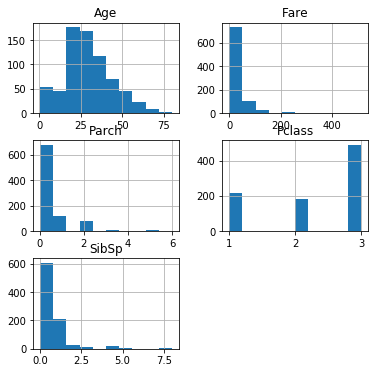

In [23]:
_ = train.hist(figsize=(6, 6))

In [24]:
# Does zero fares mean missing value ?
train.query('Fare==0')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
180,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [25]:
test.query('Fare==0')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


In [26]:
np.corrcoef(train['Fare'], train['Pclass'])

array([[ 1.        , -0.54949962],
       [-0.54949962,  1.        ]])

In [68]:
traintest['SibSp_and_Parch'] = traintest['SibSp'] + traintest['Parch']

traintest['same_ticket_count'] = traintest.Ticket.map(traintest['Ticket'].value_counts())

traintest['lastname_count'] = traintest.lastname.map(traintest['lastname'].value_counts())

In [95]:
# correct Fare -> Fare / same_ticket_count
traintest['Fare_correct'] = traintest['Fare'] / traintest['same_ticket_count']

In [29]:
train.corr()

,Pclass,Age,SibSp,Parch,Fare,SibSp_and_Parch
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
SibSp_and_Parch,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [73]:
# Fare -> sharing by family group
traintest.query('Fare > 250')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket,lastname
PassengerId,,,,,,,,,,,,
28,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,1,male,3,5,19950,Fortune
89,23.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Mabel Helen",2,1,female,3,5,19950,Fortune
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,0,PC 17755,Ward
312,18.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Emily Borie",2,1,female,2,4,PC 17608,Ryerson
342,24.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Alice Elizabeth",2,1,female,3,5,19950,Fortune
439,64.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Mark",4,1,male,1,5,19950,Fortune
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Cardeza
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,0,PC 17755,Lesurer
743,21.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Susan Parker ""Suzette""",2,1,female,2,4,PC 17608,Ryerson


In [58]:
traintest['lastname'] = traintest.Name.str.split(',').str.get(0)

In [62]:
traintest['lastname'].value_counts()[:10]

Sage         11
Andersson    11
Goodwin       8
Asplund       8
Davies        7
Johnson       6
Fortune       6
Smith         6
Brown         6
Ford          6
Name: lastname, dtype: int64

In [89]:
traintest.query('lastname=="Sage"')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,lastname_count
PassengerId,,,,,,,,,,,,,,
160,NaN,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,10,CA. 2343,Sage,11,11
181,NaN,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,10,CA. 2343,Sage,11,11
202,NaN,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,10,CA. 2343,Sage,11,11
325,NaN,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,10,CA. 2343,Sage,11,11
793,NaN,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,10,CA. 2343,Sage,11,11
847,NaN,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,3,male,8,10,CA. 2343,Sage,11,11
864,NaN,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,10,CA. 2343,Sage,11,11
1080,NaN,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,10,CA. 2343,Sage,11,11
1234,NaN,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,10,CA. 2343,Sage,11,11


In [90]:
traintest.query('lastname=="Andersson"')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,lastname_count
PassengerId,,,,,,,,,,,,,,
14,39.0,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,3,male,1,6,347082,Andersson,7,11
69,17.0,NaN,S,7.9250,"Andersson, Miss. Erna Alexandra",2,3,female,4,6,3101281,Andersson,1,11
120,2.0,NaN,S,31.2750,"Andersson, Miss. Ellis Anna Maria",2,3,female,4,6,347082,Andersson,7,11
147,27.0,NaN,S,7.7958,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,3,male,0,0,350043,Andersson,1,11
542,9.0,NaN,S,31.2750,"Andersson, Miss. Ingeborg Constanzia",2,3,female,4,6,347082,Andersson,7,11
543,11.0,NaN,S,31.2750,"Andersson, Miss. Sigrid Elisabeth",2,3,female,4,6,347082,Andersson,7,11
611,39.0,NaN,S,31.2750,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",5,3,female,1,6,347082,Andersson,7,11
814,6.0,NaN,S,31.2750,"Andersson, Miss. Ebba Iris Alfrida",2,3,female,4,6,347082,Andersson,7,11
851,4.0,NaN,S,31.2750,"Andersson, Master. Sigvard Harald Elias",2,3,male,4,6,347082,Andersson,7,11


In [91]:
traintest.query('lastname=="Goodwin"')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,lastname_count
PassengerId,,,,,,,,,,,,,,
60,11.0,NaN,S,46.9,"Goodwin, Master. William Frederick",2,3,male,5,7,CA 2144,Goodwin,8,8
72,16.0,NaN,S,46.9,"Goodwin, Miss. Lillian Amy",2,3,female,5,7,CA 2144,Goodwin,8,8
387,1.0,NaN,S,46.9,"Goodwin, Master. Sidney Leonard",2,3,male,5,7,CA 2144,Goodwin,8,8
481,9.0,NaN,S,46.9,"Goodwin, Master. Harold Victor",2,3,male,5,7,CA 2144,Goodwin,8,8
679,43.0,NaN,S,46.9,"Goodwin, Mrs. Frederick (Augusta Tyler)",6,3,female,1,7,CA 2144,Goodwin,8,8
684,14.0,NaN,S,46.9,"Goodwin, Mr. Charles Edward",2,3,male,5,7,CA 2144,Goodwin,8,8
1031,40.0,NaN,S,46.9,"Goodwin, Mr. Charles Frederick",6,3,male,1,7,CA 2144,Goodwin,8,8
1032,10.0,NaN,S,46.9,"Goodwin, Miss. Jessie Allis",2,3,female,5,7,CA 2144,Goodwin,8,8


In [92]:
traintest.query('lastname=="Asplund"')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,lastname_count
PassengerId,,,,,,,,,,,,,,
26,38.0,NaN,S,31.3875,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",5,3,female,1,6,347077,Asplund,7,8
183,9.0,NaN,S,31.3875,"Asplund, Master. Clarence Gustaf Hugo",2,3,male,4,6,347077,Asplund,7,8
234,5.0,NaN,S,31.3875,"Asplund, Miss. Lillian Gertrud",2,3,female,4,6,347077,Asplund,7,8
262,3.0,NaN,S,31.3875,"Asplund, Master. Edvin Rojj Felix",2,3,male,4,6,347077,Asplund,7,8
1046,13.0,NaN,S,31.3875,"Asplund, Master. Filip Oscar",2,3,male,4,6,347077,Asplund,7,8
1066,40.0,NaN,S,31.3875,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",5,3,male,1,6,347077,Asplund,7,8
1118,23.0,NaN,S,7.7958,"Asplund, Mr. Johan Charles",0,3,male,0,0,350054,Asplund,1,8
1271,5.0,NaN,S,31.3875,"Asplund, Master. Carl Edgar",2,3,male,4,6,347077,Asplund,7,8


In [93]:
traintest.query('lastname=="Fortune"')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,lastname_count
PassengerId,,,,,,,,,,,,,,
28,19.0,C23 C25 C27,S,263.0,"Fortune, Mr. Charles Alexander",2,1,male,3,5,19950,Fortune,6,6
89,23.0,C23 C25 C27,S,263.0,"Fortune, Miss. Mabel Helen",2,1,female,3,5,19950,Fortune,6,6
342,24.0,C23 C25 C27,S,263.0,"Fortune, Miss. Alice Elizabeth",2,1,female,3,5,19950,Fortune,6,6
439,64.0,C23 C25 C27,S,263.0,"Fortune, Mr. Mark",4,1,male,1,5,19950,Fortune,6,6
945,28.0,C23 C25 C27,S,263.0,"Fortune, Miss. Ethel Flora",2,1,female,3,5,19950,Fortune,6,6
961,60.0,C23 C25 C27,S,263.0,"Fortune, Mrs. Mark (Mary McDougald)",4,1,female,1,5,19950,Fortune,6,6


In [94]:
traintest.query('Fare==0')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,lastname_count
PassengerId,,,,,,,,,,,,,,
180,36.0,NaN,S,0.0,"Leonard, Mr. Lionel",0,3,male,0,0,LINE,Leonard,4,1
264,40.0,B94,S,0.0,"Harrison, Mr. William",0,1,male,0,0,112059,Harrison,1,1
272,25.0,NaN,S,0.0,"Tornquist, Mr. William Henry",0,3,male,0,0,LINE,Tornquist,4,1
278,NaN,NaN,S,0.0,"Parkes, Mr. Francis ""Frank""",0,2,male,0,0,239853,Parkes,3,1
303,19.0,NaN,S,0.0,"Johnson, Mr. William Cahoone Jr",0,3,male,0,0,LINE,Johnson,4,6
414,NaN,NaN,S,0.0,"Cunningham, Mr. Alfred Fleming",0,2,male,0,0,239853,Cunningham,3,1
467,NaN,NaN,S,0.0,"Campbell, Mr. William",0,2,male,0,0,239853,Campbell,3,1
482,NaN,NaN,S,0.0,"Frost, Mr. Anthony Wood ""Archie""",0,2,male,0,0,239854,Frost,1,1
598,49.0,NaN,S,0.0,"Johnson, Mr. Alfred",0,3,male,0,0,LINE,Johnson,4,6


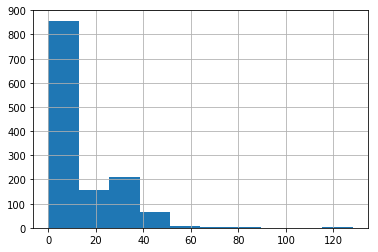

In [96]:
traintest['Fare_correct'].hist()

In [99]:
traintest['Fare_correct'].describe()

count    1308.000000
mean       14.757627
std        13.555638
min         0.000000
25%         7.550000
50%         8.050000
75%        15.008325
max       128.082300
Name: Fare_correct, dtype: float64

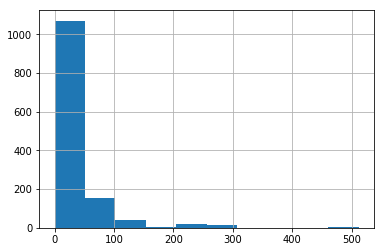

In [97]:
traintest['Fare'].hist()

In [102]:
fare_by_pclass = traintest.groupby('Pclass')['Fare_correct']

In [111]:
traintest.Pclass.value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare_correct, dtype: object

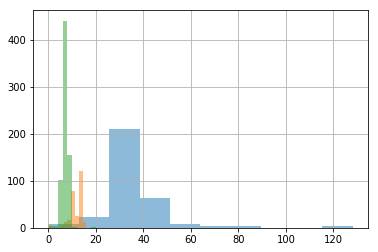

In [115]:
# corrected Fare: Histogram plot
fare_by_pclass.hist(bins=10, alpha=.5)

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

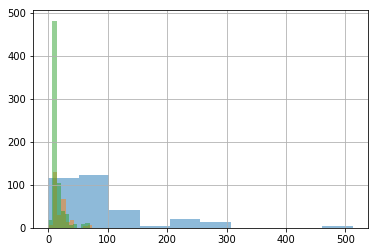

In [114]:
# incorrect Fare: histogram plot
traintest.groupby('Pclass')['Fare'].hist(bins=10, alpha=.5)

In [117]:
# fill 0 Fare according to passenger class
fare_median_by_class = fare_by_pclass.median()
fare_median_by_class

Pclass
1    29.70
2    12.35
3     7.75
Name: Fare_correct, dtype: float64

In [139]:
for p in [1,2,3]:
    idx = traintest.query('Fare_correct==0 & Pclass=={}'.format(p)).index

    traintest.loc[idx, ['Fare', 'Fare_correct']] = fare_median_by_class[p]

In [143]:
# fill NaN Fare: class 3
traintest.loc[traintest.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,lastname_count,Fare_correct
PassengerId,,,,,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,0,3701,Storey,1,1,NaN


In [146]:
traintest.loc[1044, ['Fare', 'Fare_correct']] = fare_median_by_class[3]

#### Embarked missing

In [154]:
traintest['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [159]:
traintest.query('Embarked != Embarked')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,lastname_count,Fare_correct
PassengerId,,,,,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,0,113572,Icard,2,1,40.0
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,0,113572,Stone,2,1,40.0


In [165]:
traintest.groupby(['Pclass', 'Embarked'])['Age'].count().unstack(0)

Pclass,1,2,3
Embarked,,,
C,128,24,60
Q,3,5,42
S,151,232,399


In [167]:
# fill missing Embarked with mode->[S]
traintest.loc[[62, 830], 'Embarked'] = 'S'

In [169]:
traintest.Embarked.value_counts(normalize=True)

S    0.699771
C    0.206264
Q    0.093965
Name: Embarked, dtype: float64

In [174]:
# dummy Embark
traintest = pd.get_dummies(traintest, columns=['Embarked'], drop_first=False) 

#### cabin missing

In [179]:
# feature engineering : missing cabin 
traintest['cabin_missing'] = traintest.Cabin.isnull()

In [180]:
traintest.Cabin.value_counts(dropna=False).head()

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
C22 C26               4
Name: Cabin, dtype: int64

In [182]:
cabin_char = traintest.Cabin.str.get(0)

In [183]:
cabin_char.value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [191]:
def group_cabin_char(c):
    if c in {'C', 'B', 'D', 'E'}:
        return c
    elif c in {'A', 'F', 'G', 'T'}:
        return 'O'    # other
    else:
        return 'U'   # unknown
traintest['cabin_char'] = traintest.Cabin.str.get(0).map(group_cabin_char)

In [192]:
traintest['cabin_char'].value_counts()

U    1014
C      94
B      65
O      49
D      46
E      41
Name: cabin_char, dtype: int64

In [194]:
# dummy cabin_char
traintest = pd.get_dummies(traintest, columns=['cabin_char'])
traintest.drop(['Cabin', 'Fare'], axis=1, inplace=True)

In [195]:
traintest.head()

,Age,Name,Parch,Pclass,Sex,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,...,Embarked_C,Embarked_Q,Embarked_S,cabin_missing,cabin_char_B,cabin_char_C,cabin_char_D,cabin_char_E,cabin_char_O,cabin_char_U
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,"Braund, Mr. Owen Harris",0,3,male,1,1,A/5 21171,Braund,1,...,0,0,1,True,0,0,0,0,0,1
2,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Cumings,2,...,1,0,0,False,0,1,0,0,0,0
3,26.0,"Heikkinen, Miss. Laina",0,3,female,0,0,STON/O2. 3101282,Heikkinen,1,...,0,0,1,True,0,0,0,0,0,1
4,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Futrelle,2,...,0,0,1,False,0,1,0,0,0,0
5,35.0,"Allen, Mr. William Henry",0,3,male,0,0,373450,Allen,1,...,0,0,1,True,0,0,0,0,0,1


#### same_ticket_count : grouping

In [196]:
traintest.same_ticket_count.value_counts()

1     713
2     264
3     147
4      64
7      35
5      35
6      24
8      16
11     11
Name: same_ticket_count, dtype: int64

In [198]:
# new groups -> [1, 2, 3, >4]
traintest['same_ticket_count'] = traintest.same_ticket_count.map(lambda x: x if x < 4 else 4)

In [199]:
traintest['same_ticket_count'].value_counts()

1    713
2    264
4    185
3    147
Name: same_ticket_count, dtype: int64

#### Sex

In [203]:
traintest['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [205]:
# dummy Sex
traintest = pd.get_dummies(traintest, columns=['Sex'])

#### Name Title

In [219]:
traintest.Name.str.extract(', (\w+).').value_counts()

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Capt          1
Lady          1
Jonkheer      1
Dona          1
Mme           1
Sir           1
the           1
Don           1
Name: Name, dtype: int64

In [216]:
traintest[traintest.Name.str.contains(', the')]['Name']

PassengerId
760    Rothes, the Countess. of (Lucy Noel Martha Dye...
Name: Name, dtype: object

In [221]:
traintest['name_title'] = traintest.Name.str.extract(', (\w+).', expand=False).map(lambda x: x if x!='the' else 'Countess')

In [222]:
traintest['name_title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Capt          1
Lady          1
Jonkheer      1
Dona          1
Mme           1
Sir           1
Countess      1
Don           1
Name: name_title, dtype: int64

In [223]:
traintest.query('name_title=="Ms"')

,Age,Name,Parch,Pclass,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,lastname_count,...,cabin_missing,cabin_char_B,cabin_char_C,cabin_char_D,cabin_char_E,cabin_char_O,cabin_char_U,Sex_female,Sex_male,name_title
PassengerId,,,,,,,,,,,,,,,,,,,,,
444,28.0,"Reynaldo, Ms. Encarnacion",0,2,0,0,230434,Reynaldo,1,1,...,True,0,0,0,0,0,1,1,0,Ms
980,NaN,"O'Donoghue, Ms. Bridget",0,3,0,0,364856,O'Donoghue,1,1,...,True,0,0,0,0,0,1,1,0,Ms


In [224]:
def title_correction(name):
    if name in {'Mr', 'Miss', 'Mrs', 'Master'}:
        return name
    elif name in {'Mlle', 'Mme'}:
        return 'Mrs'
    elif name == 'Ms':
        return 'Miss'
    else:
        return 'Others'

In [226]:
traintest['name_title'] = traintest['name_title'].map(title_correction)

In [227]:
traintest['name_title'].value_counts()

Mr        757
Miss      262
Mrs       200
Master     61
Others     29
Name: name_title, dtype: int64

#### Age missing

In [228]:
missing_age = traintest.query('Age!=Age')

In [229]:
missing_age

,Age,Name,Parch,Pclass,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,lastname_count,...,cabin_missing,cabin_char_B,cabin_char_C,cabin_char_D,cabin_char_E,cabin_char_O,cabin_char_U,Sex_female,Sex_male,name_title
PassengerId,,,,,,,,,,,,,,,,,,,,,
6,NaN,"Moran, Mr. James",0,3,0,0,330877,Moran,1,3,...,True,0,0,0,0,0,1,0,1,Mr
18,NaN,"Williams, Mr. Charles Eugene",0,2,0,0,244373,Williams,1,5,...,True,0,0,0,0,0,1,0,1,Mr
20,NaN,"Masselmani, Mrs. Fatima",0,3,0,0,2649,Masselmani,1,1,...,True,0,0,0,0,0,1,1,0,Mrs
27,NaN,"Emir, Mr. Farred Chehab",0,3,0,0,2631,Emir,1,1,...,True,0,0,0,0,0,1,0,1,Mr
29,NaN,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,0,0,330959,O'Dwyer,1,1,...,True,0,0,0,0,0,1,1,0,Miss
30,NaN,"Todoroff, Mr. Lalio",0,3,0,0,349216,Todoroff,1,1,...,True,0,0,0,0,0,1,0,1,Mr
32,NaN,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,1,1,PC 17569,Spencer,3,2,...,False,1,0,0,0,0,0,1,0,Mrs
33,NaN,"Glynn, Miss. Mary Agatha",0,3,0,0,335677,Glynn,1,1,...,True,0,0,0,0,0,1,1,0,Miss
37,NaN,"Mamee, Mr. Hanna",0,3,0,0,2677,Mamee,1,1,...,True,0,0,0,0,0,1,0,1,Mr


In [231]:
missing_age['name_title'].value_counts()

Mr        176
Miss       51
Mrs        27
Master      8
Others      1
Name: name_title, dtype: int64

In [232]:
traintest.groupby('name_title')['Age'].agg(['mean', 'median'])

,mean,median
name_title,,
Master,5.482642,4.0
Miss,21.803744,22.0
Mr,32.252151,29.0
Mrs,36.768786,35.0
Others,45.178571,47.5


In [235]:
# fill missing ages according to their name titles using median age
median_age_by_title = traintest.groupby('name_title')['Age'].median()
median_age_by_title

name_title
Master     4.0
Miss      22.0
Mr        29.0
Mrs       35.0
Others    47.5
Name: Age, dtype: float64

In [242]:
for m in ['Master', 'Miss', 'Mr', 'Mrs', 'Others']:
    missing_idx = traintest.query('name_title=="{}" & Age!=Age'.format(m)).index
    traintest.loc[missing_idx, 'Age'] = median_age_by_title[m]

In [244]:
traintest.Age.isnull().sum()

0

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

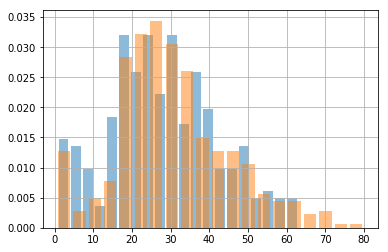

In [248]:
train.groupby('Sex')['Age'].hist(bins=20, rwidth=.8, normed=True, alpha=.5)

Sex_male
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

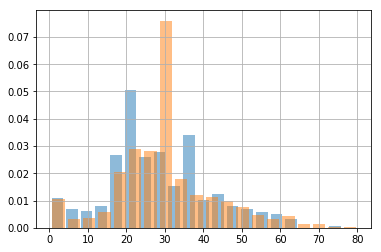

In [251]:
# peaks at median fills -> Mister[29], Miss[22], Mrs[35]
traintest.groupby('Sex_male')['Age'].hist(bins=20, rwidth=.8, normed=True, alpha=.5)

In [254]:
# dummy name title
traintest = pd.get_dummies(traintest, columns=['name_title'])

In [255]:
traintest.head()

,Age,Name,Parch,Pclass,SibSp,SibSp_and_Parch,Ticket,lastname,same_ticket_count,lastname_count,...,cabin_char_E,cabin_char_O,cabin_char_U,Sex_female,Sex_male,name_title_Master,name_title_Miss,name_title_Mr,name_title_Mrs,name_title_Others
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,"Braund, Mr. Owen Harris",0,3,1,1,A/5 21171,Braund,1,2,...,0,0,1,0,1,0,0,1,0,0
2,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,PC 17599,Cumings,2,2,...,0,0,0,1,0,0,0,0,1,0
3,26.0,"Heikkinen, Miss. Laina",0,3,0,0,STON/O2. 3101282,Heikkinen,1,1,...,0,0,1,1,0,0,1,0,0,0
4,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,113803,Futrelle,2,2,...,0,0,0,1,0,0,0,0,1,0
5,35.0,"Allen, Mr. William Henry",0,3,0,0,373450,Allen,1,2,...,0,0,1,0,1,0,0,1,0,0


In [263]:
# drop string columns
traintest.drop(['Name', 'Ticket', 'lastname'], axis=1, inplace=True)

In [264]:
train_prepared = traintest.iloc[:n_train]
test_prepared = traintest.iloc[n_train:]

train_prepared.shape, test_prepared.shape

((891, 25), (418, 25))

#### LogisticRegression Baseline

In [308]:
scores = cross_val_score(LogisticRegression(), train_prepared, labels, 
                         scoring='accuracy', cv=10)

In [309]:
scores

array([0.82222222, 0.84444444, 0.78651685, 0.86516854, 0.83146067,
       0.79775281, 0.82022472, 0.82022472, 0.88764045, 0.85227273])

In [310]:
np.mean(scores)

0.8327928157984337

In [275]:
lr = LogisticRegression()
lr.fit(train_prepared, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [282]:
s = pd.Series(lr.coef_[0], index=train_prepared.columns).sort_values(ascending=False)

Text(0.5,1,'LogisticRegression: Coef_')

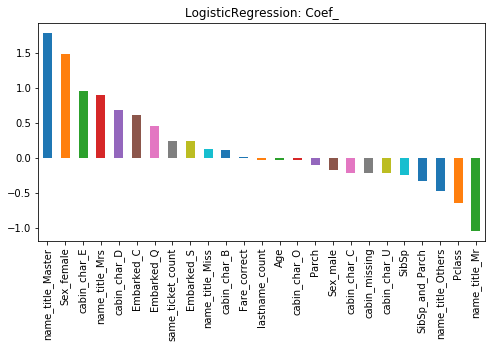

In [286]:
s.plot.bar(figsize=(8, 4))
plt.title('LogisticRegression: Coef_')

In [290]:
y_pred = lr.predict(test_prepared)

In [292]:
submit['Survived'] = y_pred

In [294]:
submit.to_csv('lr_1.csv', index=False)

In [304]:
std_lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

scores = cross_val_score(std_lr_pipe, train_prepared, labels, cv=5, scoring='accuracy')
scores

array([0.83240223, 0.81564246, 0.80898876, 0.82022472, 0.87570621])

In [305]:
np.mean(scores)

0.8305928781145525

In [306]:
std_lr_pipe.fit(train_prepared, labels)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [307]:
y_pred = std_lr_pipe.predict(test_prepared)
submit['Survived'] = y_pred
submit.to_csv('lr_std_1.csv', index=False)

#### RandomForest Baseline

In [311]:
scores = cross_val_score(RandomForestClassifier(), train_prepared, labels, 
                         scoring='accuracy', cv=10)
scores

array([0.77777778, 0.82222222, 0.76404494, 0.84269663, 0.82022472,
       0.86516854, 0.75280899, 0.76404494, 0.84269663, 0.81818182])

In [312]:
np.mean(scores)

0.8069867211440245

In [296]:
rf = RandomForestClassifier()
rf.fit(train_prepared, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [297]:
y_pred = rf.predict(test_prepared)

In [298]:
submit['Survived'] = y_pred

In [300]:
submit.to_csv('rf_1.csv', index=False)




### EDA with survived

In [314]:
train_data = train_prepared.copy()

In [315]:
train_data['Survived'] = labels.values

In [319]:
train_data.head()

,Age,Parch,Pclass,SibSp,SibSp_and_Parch,same_ticket_count,lastname_count,Fare_correct,Embarked_C,Embarked_Q,...,cabin_char_O,cabin_char_U,Sex_female,Sex_male,name_title_Master,name_title_Miss,name_title_Mr,name_title_Mrs,name_title_Others,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,0,3,1,1,1,2,7.25000,0,0,...,0,1,0,1,0,0,1,0,0,0
2,38.0,0,1,1,1,2,2,35.64165,1,0,...,0,0,1,0,0,0,0,1,0,1
3,26.0,0,3,0,0,1,1,7.92500,0,0,...,0,1,1,0,0,1,0,0,0,1
4,35.0,0,1,1,1,2,2,26.55000,0,0,...,0,0,1,0,0,0,0,1,0,1
5,35.0,0,3,0,0,1,2,8.05000,0,0,...,0,1,0,1,0,0,1,0,0,0


In [321]:
corr = train_data.corr()

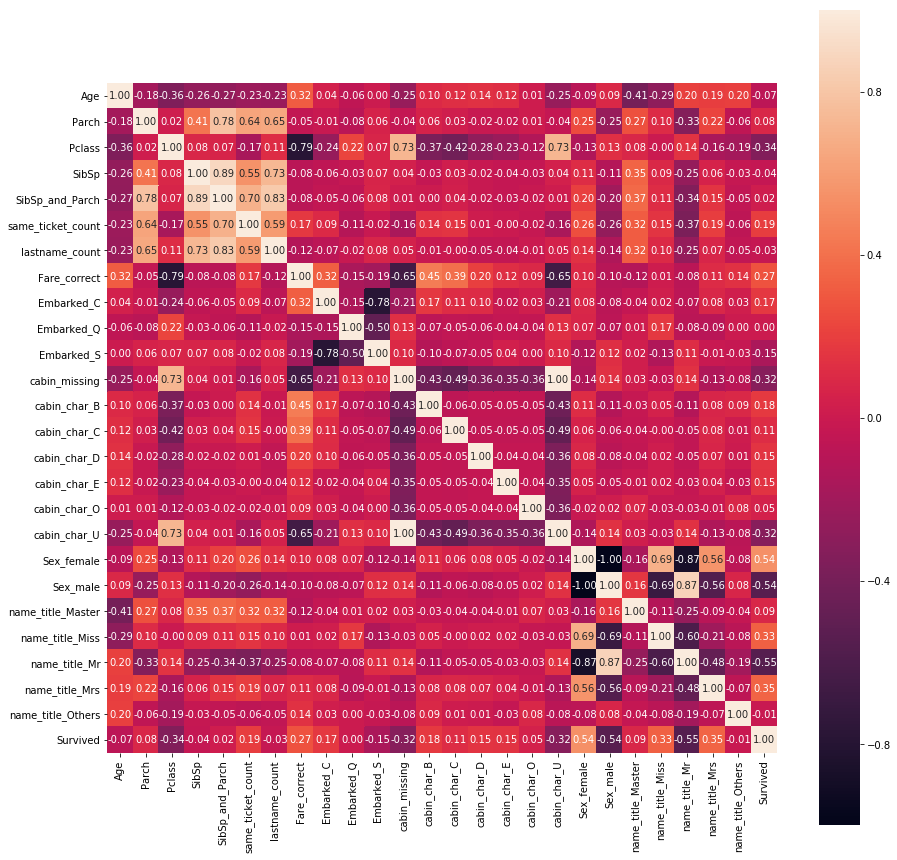

In [326]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, square=True, fmt='.2f', ax=ax, vmax=1, vmin=-1)

In [327]:
train_data.columns

Index(['Age', 'Parch', 'Pclass', 'SibSp', 'SibSp_and_Parch',
       'same_ticket_count', 'lastname_count', 'Fare_correct', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'cabin_missing', 'cabin_char_B',
       'cabin_char_C', 'cabin_char_D', 'cabin_char_E', 'cabin_char_O',
       'cabin_char_U', 'Sex_female', 'Sex_male', 'name_title_Master',
       'name_title_Miss', 'name_title_Mr', 'name_title_Mrs',
       'name_title_Others', 'Survived'],
      dtype='object')

In [332]:
train_data.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64